### 03_descriptive stats

using `where`, `isNull`, `dropna`, `fillna`, `isnan` to find/fill  missing data on Pyspark dataframes

In [9]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName('PySparkmissing').getOrCreate()
import pandas as pd
sc = SparkSession.sparkContext

In [18]:
spdfA = spark.read.csv('02_MockDataset.csv',inferSchema=True,header=True)
spdfA.printSchema()

root
 |-- id: integer (nullable = true)
 |-- ip_address: string (nullable = true)
 |-- SPAM: integer (nullable = true)
 |-- numvar: double (nullable = true)



In [19]:

df_described = spdfA.describe()
df_described.show()

+-------+------------------+--------------+------------------+------------------+
|summary|                id|    ip_address|              SPAM|            numvar|
+-------+------------------+--------------+------------------+------------------+
|  count|               100|           100|                93|                93|
|   mean|              50.5|          null|0.5376344086021505|21.290623238709678|
| stddev|29.011491975882016|          null|0.5012839988457951|26.614498650610848|
|    min|                 1|10.181.138.135|                 0|       -37.5407812|
|    max|               100| 96.253.105.66|                 1|        62.5013857|
+-------+------------------+--------------+------------------+------------------+



In [35]:
from pyspark.sql.functions import skewness, kurtosis,col
from pyspark.sql.functions import var_pop, var_samp, stddev, stddev_pop, sumDistinct, ntile,abs

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### HISTOGRAM

In [39]:
(startValues,counts) = spdfA.select("numvar").rdd.map(lambda value: value[0]).histogram(20)
print(startValues)
print(counts)

[-37.5407812, -32.538672855, -27.536564509999998, -22.534456164999998, -17.53234782, -12.530239474999998, -7.5281311299999984, -2.526022784999995, 2.4760855600000014, 7.478193904999998, 12.480302250000001, 17.482410595000005, 22.48451894, 27.486627284999997, 32.48873563000001, 37.490843975000004, 42.49295232, 47.495060665, 52.49716900999999, 57.499277355000004, 62.5013857]
[3, 3, 1, 3, 1, 4, 8, 2, 4, 2, 7, 4, 3, 4, 9, 14, 7, 5, 6, 3]


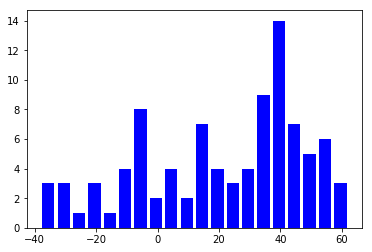

In [40]:
mid_point_bins = startValues[:-1]
widths = [np.abs(i - j+1) for i, j in zip(startValues[:-1], startValues[1:])]
bar = plt.bar(mid_point_bins, counts, width=widths, color='b', align='edge')
plt.show()

### BOXPLOT

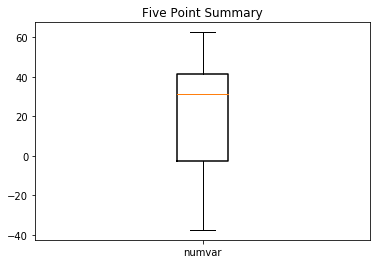

In [41]:
min_string =  spdfA.agg({"numvar": "min"}).collect()[0][0]
max_string =  spdfA.agg({"numvar": "max"}).collect()[0][0]
mean_string=  spdfA.agg({"numvar": "mean"}).collect()[0][0]
medianAndQuantiles = spdfA.stat.approxQuantile("numvar",[0.25,0.5,0.75],0.0)
(q1,median,q3) = (medianAndQuantiles[0], medianAndQuantiles[1], medianAndQuantiles[2])
#Boxplot from precomputed values
item = {}

item["label"] = 'numvar' 
item["mean"] = float(mean_string) 
item["med"] = median 
item["q1"] = q1
item["q3"] = q3
item["whislo"] = float(min_string) 
item["whishi"] = float(max_string)
item["fliers"] = []
stats = [item]

fig, axes = plt.subplots(1, 1)
axes.bxp(stats)
axes.set_title('Five Point Summary')
plt.show()